In [74]:
from pathlib import Path

file = Path('/Users/mateuszkwiatkowski/Projects/playground/kaggle/diabetes/diabetes.csv')
if not file.is_file():
    import zipfile
    with zipfile.ZipFile('/Users/mateuszkwiatkowski/Projects/datasets/archive.zip', 'r') as zip_ref:
        zip_ref.extractall('/Users/mateuszkwiatkowski/Projects/playground/kaggle/diabetes')

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exploratory data analysis

In [76]:
df = pd.read_csv('diabetes.csv')

In [77]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
df.shape

(768, 9)

In [81]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
df_no_target = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_no_target, df['Outcome'], stratify=df['Outcome'], test_size=0.2)
X_train_df = pd.DataFrame(X_train, columns=df_no_target.columns)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

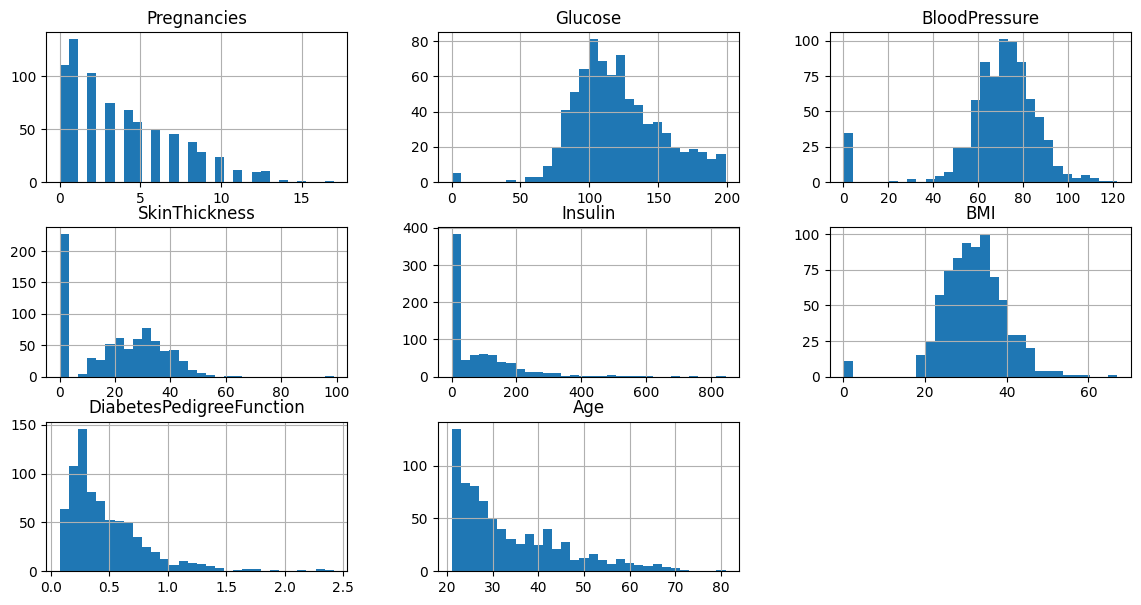

In [84]:
df.drop(['Outcome'], axis=1).hist(figsize=(14, 7), bins=30)

The data might be incomplete (zero values)

In [85]:
(df.BloodPressure == 0).sum()

35

In [86]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [87]:
from pandas.plotting import scatter_matrix

In [88]:
corr_matrix = df.corr()

In [89]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel=

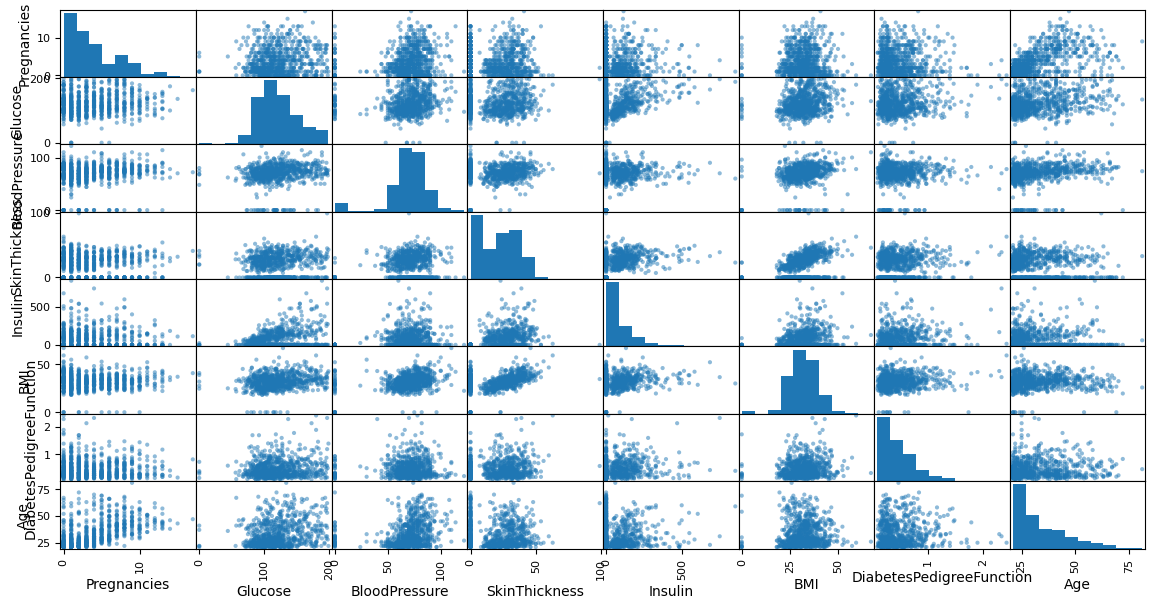

In [90]:
attributes = df_no_target.columns
scatter_matrix(df[attributes], figsize=(14, 7))

In [91]:
attributes

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [92]:
from sklearn.impute import KNNImputer, SimpleImputer

In [93]:
imputer = KNNImputer(missing_values=np.nan)

X_train_to_be_imputed_df = X_train_df.drop(['Pregnancies', 'Age'], axis=1) 
X_train_nan_df = np.where(X_train_to_be_imputed_df == 0, np.nan, X_train_to_be_imputed_df)

X_train_imputed = imputer.fit_transform(X_train_nan_df)
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train_to_be_imputed_df.columns)
X_train_imputed_df['Pregnancies'] = X_train_df['Pregnancies']
X_train_imputed_df['Age'] = X_train_df['Age']

X_train_imputed_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age
0,163.0,70.0,18.0,105.0,31.6,0.268,NaN,NaN
1,99.0,76.0,15.0,51.0,23.2,0.223,NaN,NaN
2,195.0,70.0,33.0,145.0,25.1,0.163,8.0,32.0
3,121.0,72.0,23.0,112.0,26.2,0.245,1.0,21.0
4,170.0,74.0,31.0,248.6,44.0,0.403,0.0,33.0


array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

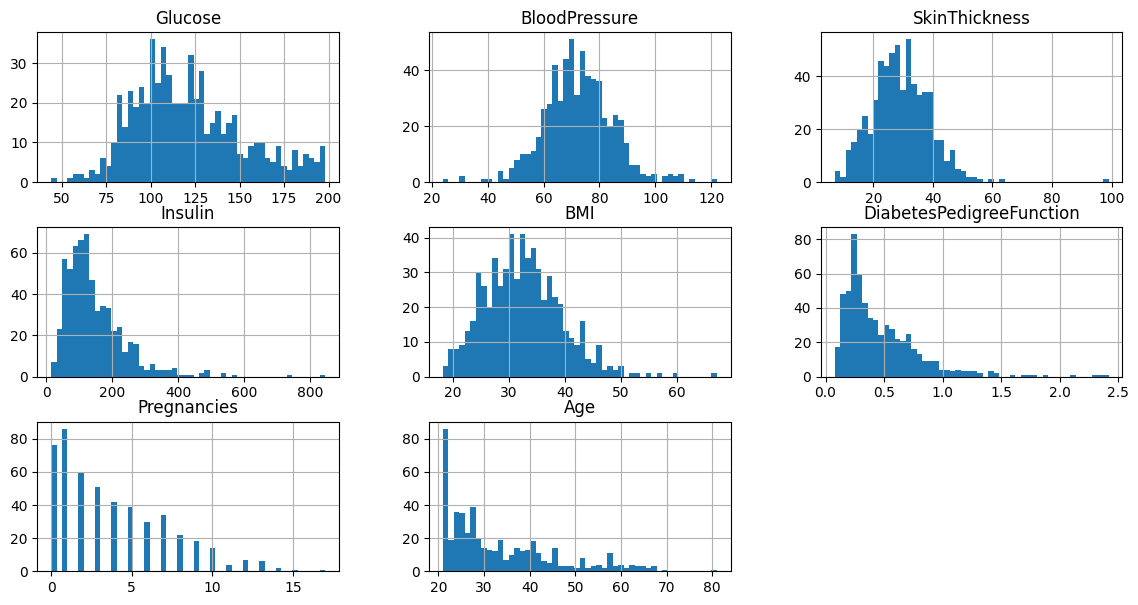

In [94]:
X_train_imputed_df.hist(figsize=(14, 7), bins=50)

In [ ]:
# Feature selection -> grid search